In [1]:
5*60*60 + 30*60

19800

In [2]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

In [3]:
csv_list = glob.glob("./AllData/Data/*.csv")

In [4]:
mean_resolution = []
mean_fps = []
mean_buffer = []

all_resolutions = []
all_fps = []
all_buffer = []

for csv_path in csv_list:
    res = np.array([[int(x.split(',')[1].split('x')[0]), int(x.split(',')[1].split('x')[1].split('@')[0])] for x in open(csv_path).read().split('\n')[:-1]])
    mean_res = np.mean(res, axis = 0)
    mean_resolution.append(mean_res)
    all_resolutions.append(res)
    
    res_fps = np.array([int(x.split(',')[1].split('@')[-1]) for x in open(csv_path).read().split('\n')[:-1]])
    fps = np.mean(res_fps)
    mean_fps.append(fps)
    all_fps.append(res_fps)
    
    res_buffer_size = np.array([float(x.split(',')[2]) for x in open(csv_path).read().split('\n')[:-1]])
    mean_buffer_size = np.mean(res_buffer_size)
    mean_buffer.append(mean_buffer_size)
    all_buffer.append(mean_buffer_size)

mean_resolution = np.array(mean_resolution)
mean_fps = np.array(mean_fps)
mean_buffer = np.array(mean_buffer)

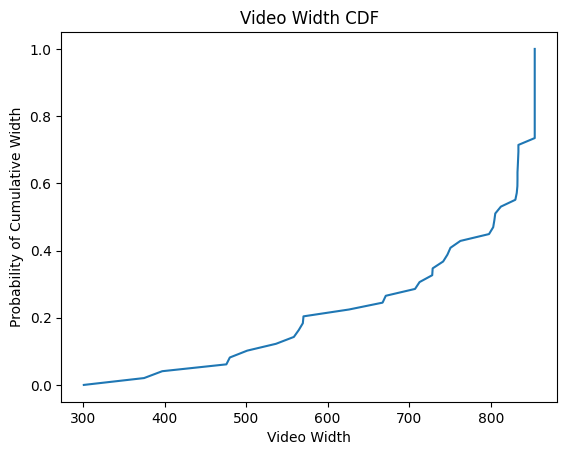

In [78]:
data_sorted = np.sort(mean_resolution[:, 0])
p = 1. * np.arange(len(mean_resolution)) / (len(mean_resolution) - 1)

plt.plot(data_sorted, p)
plt.xlabel("Video Width")
plt.ylabel("Probability of Cumulative Width")
plt.title("Video Width CDF")
plt.show()

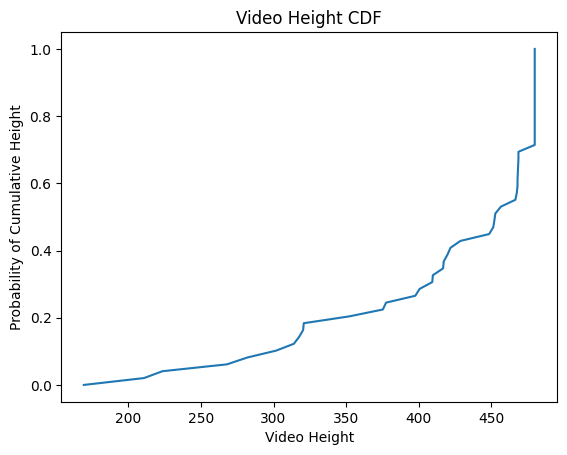

In [79]:
data_sorted = np.sort(mean_resolution[:, 1])
p = 1. * np.arange(len(mean_resolution)) / (len(mean_resolution) - 1)

plt.plot(data_sorted, p)
plt.xlabel("Video Height")
plt.ylabel("Probability of Cumulative Height")
plt.title("Video Height CDF")
plt.show()

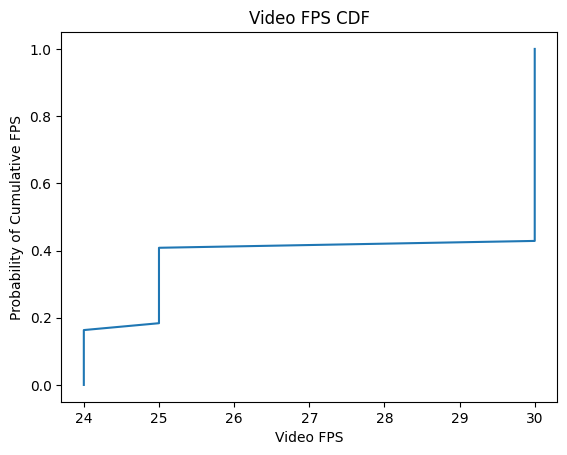

In [80]:
data_sorted = np.sort(mean_fps)
p = 1. * np.arange(len(mean_fps)) / (len(mean_fps) - 1)

plt.plot(data_sorted, p)
plt.xlabel("Video FPS")
plt.ylabel("Probability of Cumulative FPS")
plt.title("Video FPS CDF")
plt.show()

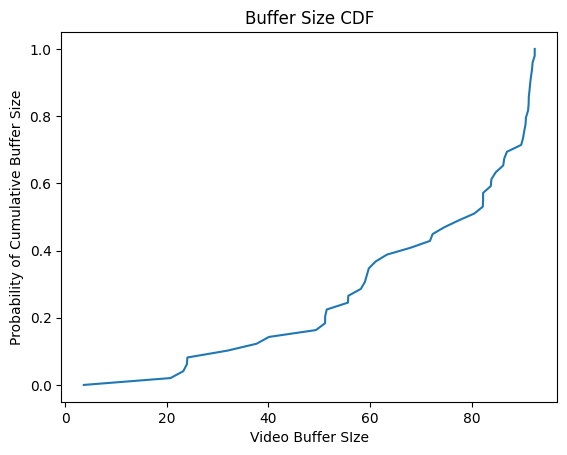

In [81]:
data_sorted = np.sort(mean_buffer)
p = 1. * np.arange(len(mean_buffer)) / (len(mean_buffer) - 1)

plt.plot(data_sorted, p)
plt.xlabel("Video Buffer SIze")
plt.ylabel("Probability of Cumulative Buffer Size")
plt.title("Buffer Size CDF")
plt.show()

In [35]:
log_list = glob.glob("./AllData/Data/*.log")

In [36]:
all_startup_time = [float(open(x).read().split("Startup Time,")[-1].split('\n')[0]) for x in log_list]
all_avg_network_bw = [float(open(x).read().split("Average Network Bandwidth,")[-1].split('\n')[0]) for x in log_list]
all_var_network_bw = [float(open(x).read().split("Variance of Network Bandwidth,")[-1].split('\n')[0]) for x in log_list]

all_startup_time = np.array(all_startup_time)
all_avg_network_bw = np.array(all_avg_network_bw)
all_var_network_bw = np.array(all_var_network_bw)

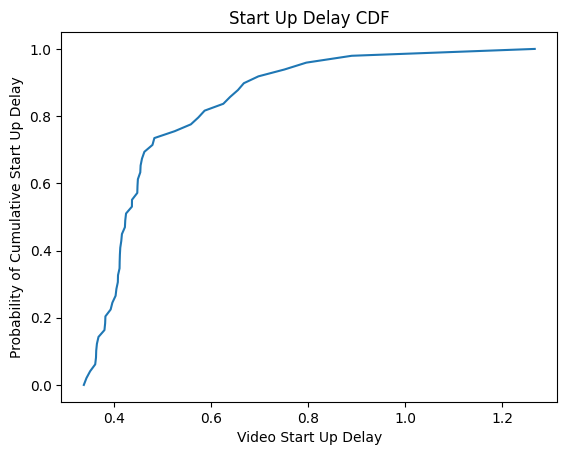

In [82]:
data_sorted = np.sort(all_startup_time)
p = 1. * np.arange(len(all_startup_time)) / (len(all_startup_time) - 1)

plt.plot(data_sorted, p)
plt.xlabel("Video Start Up Delay")
plt.ylabel("Probability of Cumulative Start Up Delay")
plt.title("Start Up Delay CDF")
plt.show()

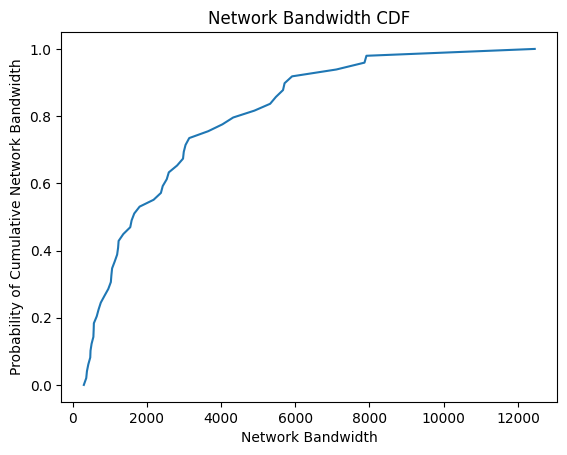

In [83]:
data_sorted = np.sort(all_avg_network_bw)
p = 1. * np.arange(len(all_avg_network_bw)) / (len(all_avg_network_bw) - 1)

plt.plot(data_sorted, p)
plt.xlabel("Network Bandwidth")
plt.ylabel("Probability of Cumulative Network Bandwidth")
plt.title("Network Bandwidth CDF")
plt.show()

In [40]:
import glob
from scapy.all import rdpcap, Raw
import json

In [56]:
pcap_list = glob.glob("./AllData/Data/*.pcap")
focus_file = pcap_list[19]

In [57]:
pcap_data = rdpcap(focus_file)

In [58]:
len(pcap_data)

33369

In [59]:
har_data = json.load(open(focus_file[:-4]+"har", 'r'))

In [60]:
len(har_data)

2731

In [61]:
all_packet_lengths = []
all_packet_counts = []
all_har_counts = []
for ind, pcap_file in enumerate(pcap_list):
    pcap_data = rdpcap(pcap_file)
    all_packet_counts.append(len(pcap_data))
    all_har_counts.append(len(json.load(open(pcap_file[:-4]+"har", 'r'))))
    packet_lengths = []
    for packet in pcap_data:
        if 'UDP' not in packet:
            continue
        if Raw not in packet['UDP']:
            continue
        packet_lengths.append(len(packet['UDP'][Raw].load))
    all_packet_lengths.append(packet_lengths)
    print(ind)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


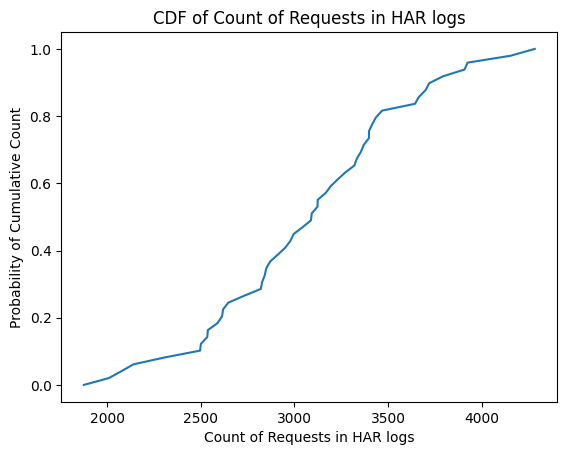

In [84]:
data_sorted = np.sort(all_har_counts)
p = 1. * np.arange(len(all_har_counts)) / (len(all_har_counts) - 1)

plt.plot(data_sorted, p)
plt.xlabel("Count of Requests in HAR logs")
plt.ylabel("Probability of Cumulative Count")
plt.title("CDF of Count of Requests in HAR logs")
plt.show()

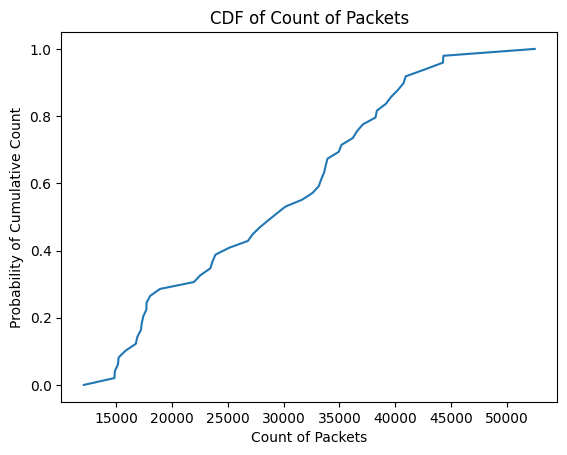

In [85]:
data_sorted = np.sort(all_packet_counts)
p = 1. * np.arange(len(all_packet_counts)) / (len(all_packet_counts) - 1)

plt.plot(data_sorted, p)
plt.xlabel("Count of Packets")
plt.ylabel("Probability of Cumulative Count")
plt.title("CDF of Count of Packets")
plt.show()

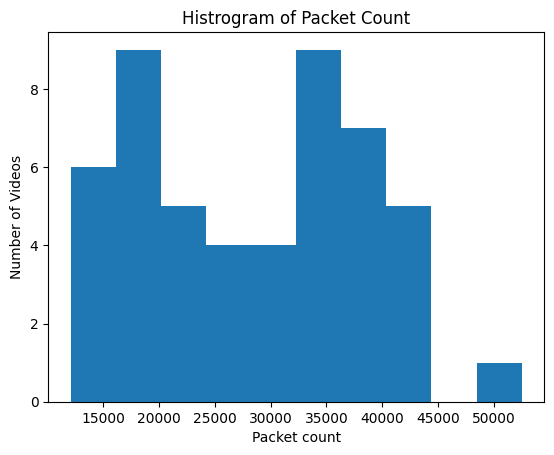

In [86]:
plt.hist(all_packet_counts)
plt.xlabel("Packet count")
plt.ylabel("Number of Videos")
plt.title("Histrogram of Packet Count")
plt.show()

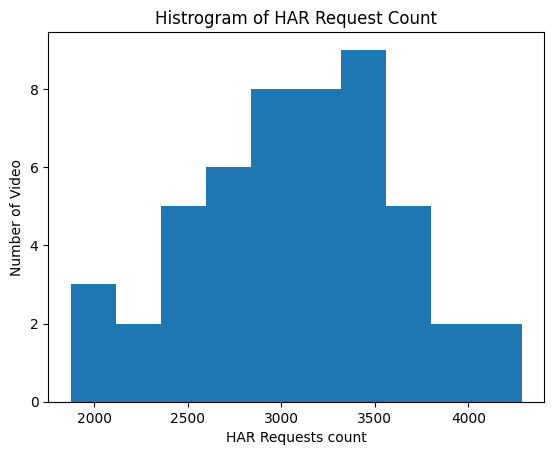

In [87]:
plt.hist(all_har_counts)
plt.xlabel("HAR Requests count")
plt.ylabel("Number of Video")
plt.title("Histrogram of HAR Request Count")
plt.show()

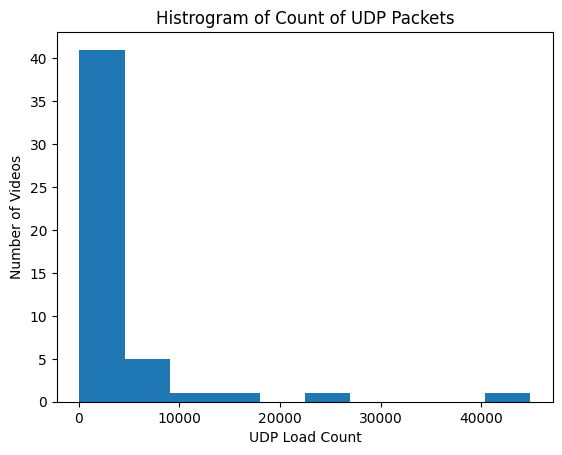

In [96]:
all_packets_upd_count = [len(x) for x in all_packet_lengths]
plt.hist(all_packets_upd_count)
plt.xlabel("UDP Load Count")
plt.ylabel("Number of Videos")
plt.title("Histrogram of Count of UDP Packets")
plt.show()

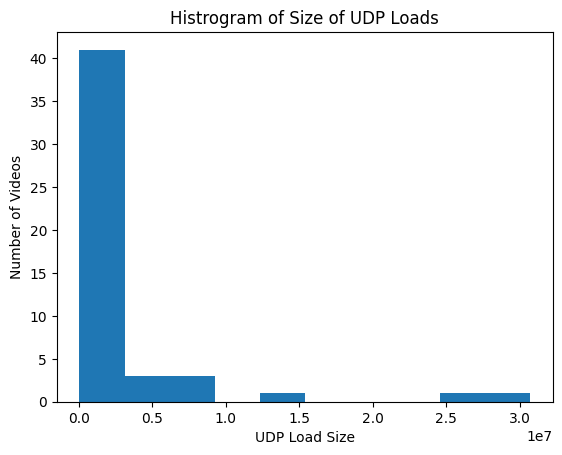

In [92]:
all_packets_upd_load_len = [sum(x) for x in all_packet_lengths]
plt.hist(all_packets_upd_load_len)
plt.xlabel("UDP Load Size")
plt.ylabel("Number of Videos")
plt.title("Histrogram of Size of UDP Loads")
plt.show()

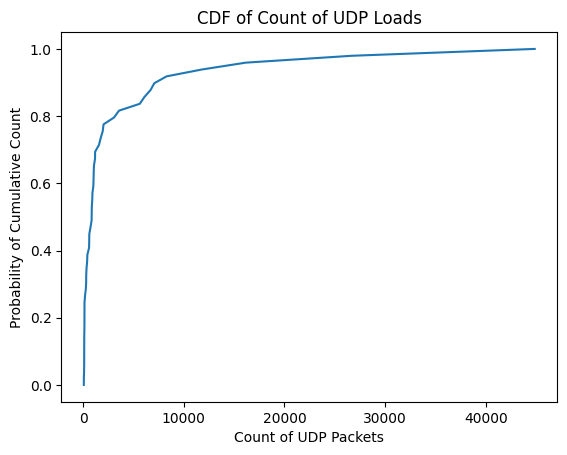

In [100]:
all_packets_upd_load_count = np.array([len(x) for x in all_packet_lengths])
data_sorted = np.sort(all_packets_upd_load_count)
p = 1. * np.arange(len(all_packets_upd_load_count)) / (len(all_packets_upd_load_count) - 1)

plt.plot(data_sorted, p)
plt.xlabel("Count of UDP Packets")
plt.ylabel("Probability of Cumulative Count")
plt.title("CDF of Count of UDP Loads")
plt.show()

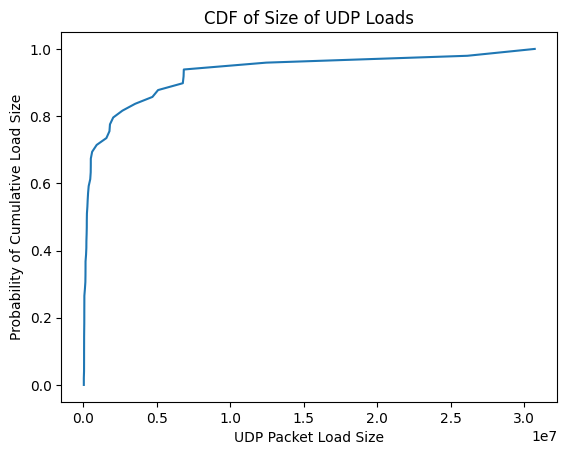

In [99]:
all_packets_upd_load_len = np.array([sum(x) for x in all_packet_lengths])
data_sorted = np.sort(all_packets_upd_load_len)
p = 1. * np.arange(len(all_packets_upd_load_len)) / (len(all_packets_upd_load_len) - 1)

plt.plot(data_sorted, p)
plt.xlabel("UDP Packet Load Size")
plt.ylabel("Probability of Cumulative Load Size")
plt.title("CDF of Size of UDP Loads")
plt.show()